R² Score: -0.44
MSE: 5665554.36


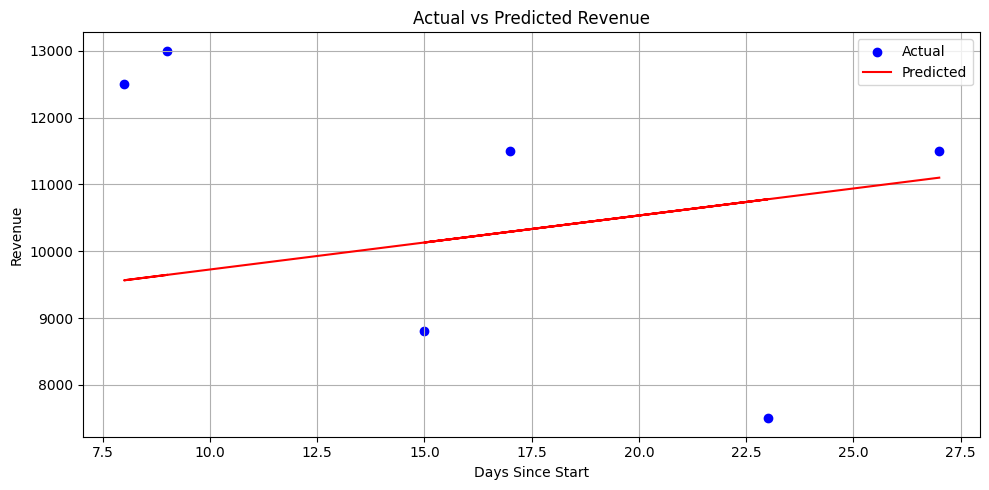


📈 Forecast for the Next 7 Days:

      date  predicted_revenue
2023-01-31       11343.071355
2023-02-01       11423.888314
2023-02-02       11504.705274
2023-02-03       11585.522234
2023-02-04       11666.339193
2023-02-05       11747.156153
2023-02-06       11827.973113


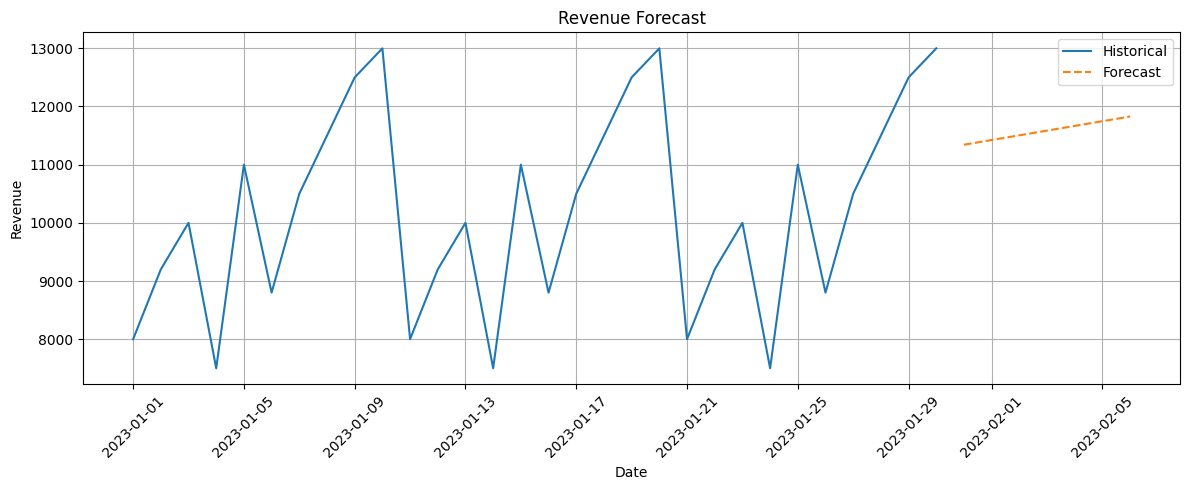

In [26]:
#problem1:  
#for the dataset being used linear regression is not suitable for it 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load CSV file
file_path = r"C:\Users\subod\Downloads\sales_data\sales_data.csv"  # ← Replace with your actual path if needed
df = pd.read_csv(file_path)

# Convert 'date' to datetime
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')


# Aggregate revenue by date (in case multiple products)
daily_sales = df.groupby('date').agg({'quantity': 'sum', 'revenue': 'sum'}).reset_index()

# Feature: days since start
daily_sales['days_since_start'] = (daily_sales['date'] - daily_sales['date'].min()).dt.days

# Prepare features and target
X = daily_sales[['days_since_start']]
y = daily_sales['revenue']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print(f"R² Score: {r2_score(y_test, y_pred):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")

# Plot actual vs predicted
plt.figure(figsize=(10, 5))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.xlabel("Days Since Start")
plt.ylabel("Revenue")
plt.title("Actual vs Predicted Revenue")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Forecast next 7 days
last_day = daily_sales['days_since_start'].max()
future_days = pd.DataFrame({'days_since_start': range(last_day + 1, last_day + 8)})
future_pred = model.predict(future_days)
future_dates = [daily_sales['date'].max() + pd.Timedelta(days=i) for i in range(1, 8)]

forecast_df = pd.DataFrame({
    'date': future_dates,
    'predicted_revenue': future_pred
})

print("\n📈 Forecast for the Next 7 Days:\n")
print(forecast_df.to_string(index=False))

# Plot historical + forecasted revenue
plt.figure(figsize=(12, 5))
sns.lineplot(data=daily_sales, x='date', y='revenue', label='Historical')
sns.lineplot(data=forecast_df, x='date', y='predicted_revenue', label='Forecast', linestyle='--')
plt.title("Revenue Forecast")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.legend()
plt.show()


Columns found: ['student_id', 'name', 'marks', 'attendance_percent', 'weekly_logins']
Average Marks: 67.1
Average Attendance: 77.8
Average Logins: 7.4
Average Marks: 67.1
Average Attendance: 77.8
Average Logins: 7.4

Correlation Matrix:
                        marks  attendance_percent  weekly_logins
marks               1.000000            0.993898       0.979474
attendance_percent  0.993898            1.000000       0.983360
weekly_logins       0.979474            0.983360       1.000000


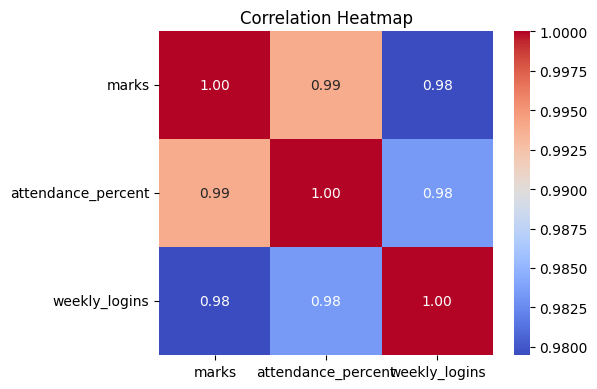

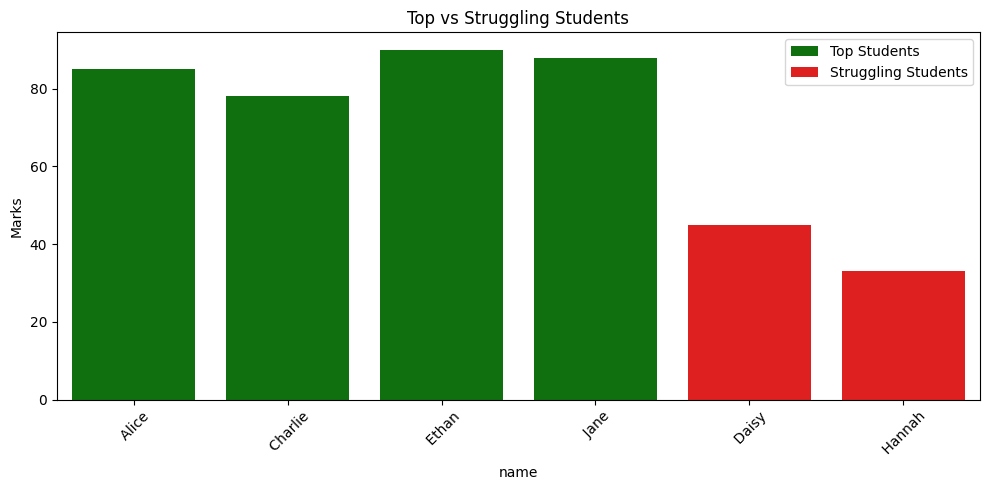

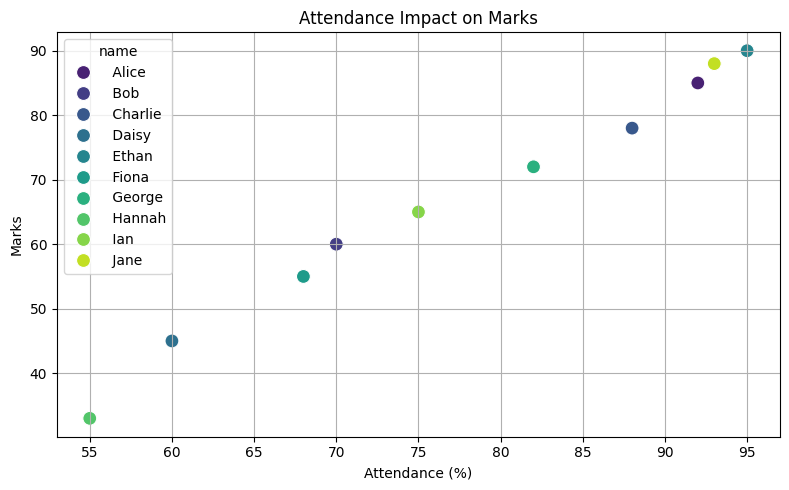

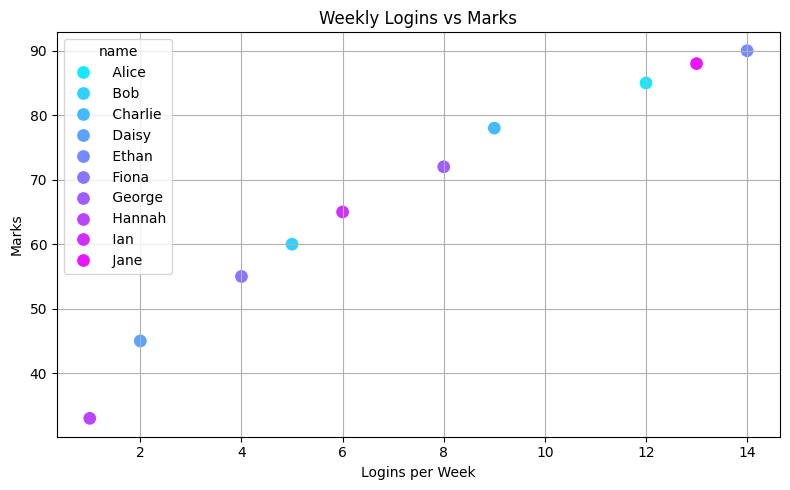

In [30]:
#problem2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
import pandas as pd

# Load the CSV
df = pd.read_csv(r"C:\Users\subod\Downloads\dataset\student_marks.csv")

# Clean column names
df.columns = df.columns.str.strip().str.lower()  # Removes extra spaces and lowercase all

# Preview columns
print("Columns found:", df.columns.tolist())

# Basic statistics
print("Average Marks:", df["marks"].mean())
print("Average Attendance:", df["attendance_percent"].mean())
print("Average Logins:", df["weekly_logins"].mean())

# Basic statistics
print("Average Marks:", df["marks"].mean())
print("Average Attendance:", df["attendance_percent"].mean())
print("Average Logins:", df["weekly_logins"].mean())

# Correlation Matrix
corr = df[["marks", "attendance_percent", "weekly_logins"]].corr()
print("\nCorrelation Matrix:\n", corr)

# Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

# Identify top vs struggling students
top_students = df[df["marks"] >= 75]
struggling_students = df[df["marks"] < 50]

# Bar plot: Top vs Struggling
plt.figure(figsize=(10, 5))
sns.barplot(x="name", y="marks", data=top_students, color="green", label="Top Students")
sns.barplot(x="name", y="marks", data=struggling_students, color="red", label="Struggling Students")
plt.title("Top vs Struggling Students")
plt.ylabel("Marks")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Attendance vs Marks
plt.figure(figsize=(8, 5))
sns.scatterplot(x="attendance_percent", y="marks", hue="name", data=df, palette="viridis", s=100)
plt.title("Attendance Impact on Marks")
plt.xlabel("Attendance (%)")
plt.ylabel("Marks")
plt.grid(True)
plt.tight_layout()
plt.show()

# Weekly Logins vs Marks
plt.figure(figsize=(8, 5))
sns.scatterplot(x="weekly_logins", y="marks", hue="name", data=df, palette="cool", s=100)
plt.title("Weekly Logins vs Marks")
plt.xlabel("Logins per Week")
plt.ylabel("Marks")
plt.grid(True)
plt.tight_layout()
plt.show()



Cluster Centers (scaled):
[[ 1.29002228  1.30054424 -1.27399814  1.38580629]
 [-0.50828067 -0.5057672   0.48791418 -0.52472277]
 [-1.05817496 -1.10787102  1.16557277 -1.06289997]
 [ 0.16050968  0.21675737 -0.32527612  0.04036329]]


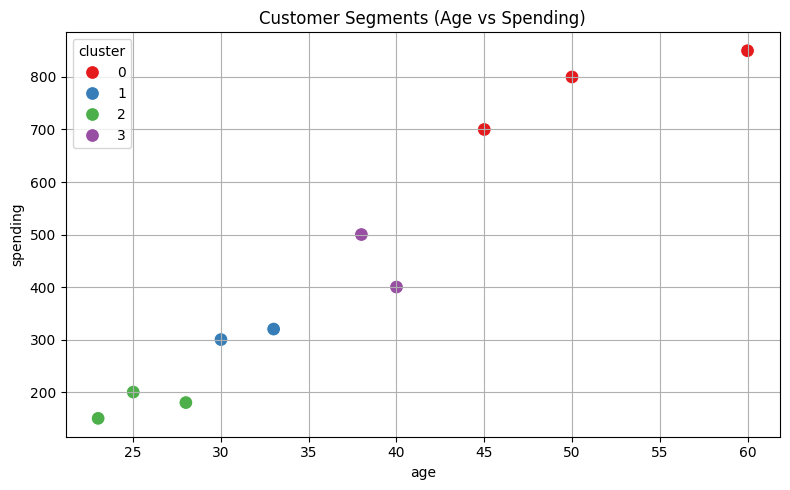

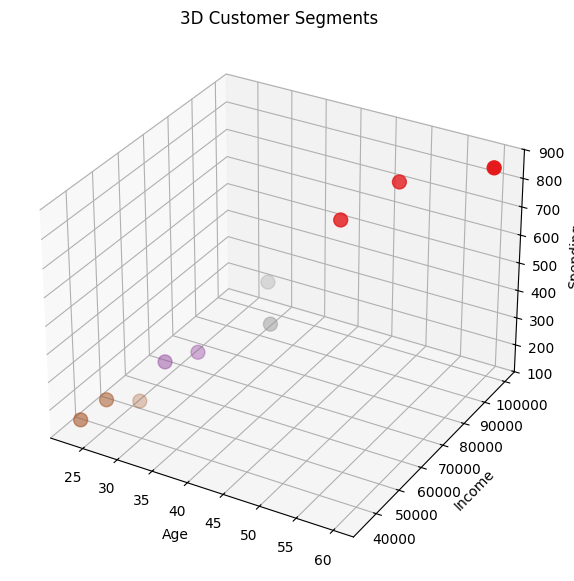


🧾 Cluster Summary:
               age   income  frequency    spending
cluster                                           
0        51.666667  90000.0        4.0  783.333333
1        31.500000  52500.0       10.5  310.000000
2        25.333333  40000.0       13.0  176.666667
3        39.000000  67500.0        7.5  450.000000


In [33]:
#problem3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

# Load data
df = pd.read_csv(r"C:\Users\subod\Downloads\dataset\customer_data.csv")

# Select relevant features
features = df[["age", "income", "frequency", "spending"]]

# Standardize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
df["cluster"] = kmeans.fit_predict(scaled_features)

# Check cluster centers (optional)
print("\nCluster Centers (scaled):")
print(kmeans.cluster_centers_)

# 2D Scatter Plot (Age vs Spending)
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="age", y="spending", hue="cluster", palette="Set1", s=100)
plt.title("Customer Segments (Age vs Spending)")
plt.grid(True)
plt.tight_layout()
plt.show()

# 3D Plot: Age, Income, Spending
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df["age"], df["income"], df["spending"], c=df["cluster"], cmap='Set1', s=100)
ax.set_xlabel("Age")
ax.set_ylabel("Income")
ax.set_zlabel("Spending")
plt.title("3D Customer Segments")
plt.show()

# Optional: Summary per cluster
print("\n🧾 Cluster Summary:")
print(df.groupby("cluster")[["age", "income", "frequency", "spending"]].mean())


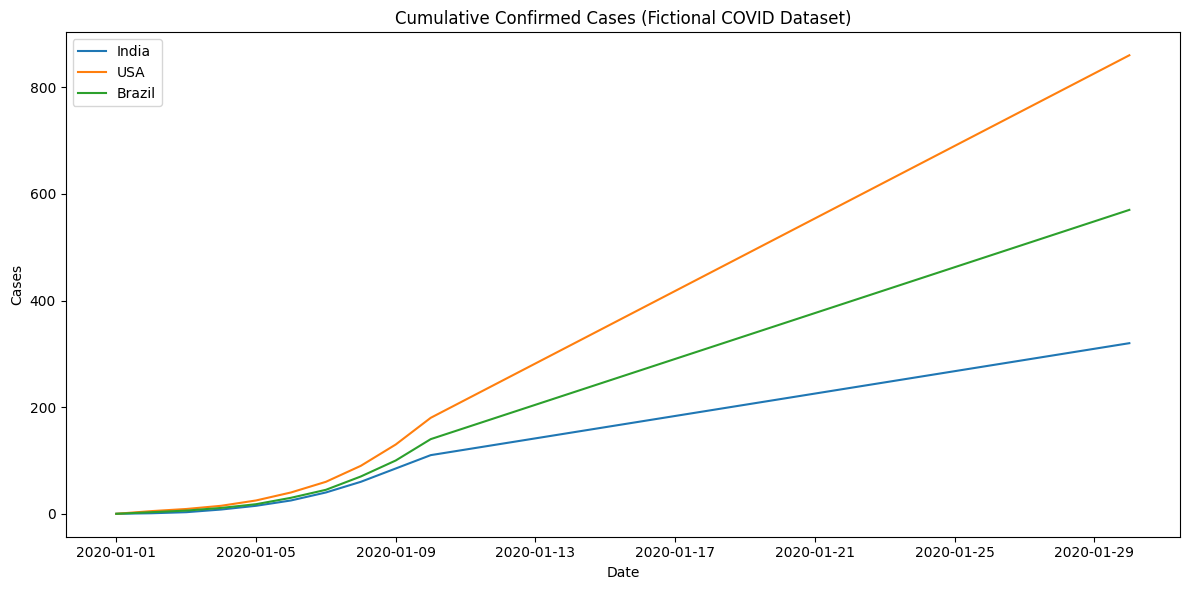

In [3]:
#problem4
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv(r"C:\Users\subod\Downloads\dataset\covid_data.csv", parse_dates=["Date"])

# Plot cumulative confirmed cases
plt.figure(figsize=(12, 6))
for country in df['Country'].unique():
    country_data = df[df['Country'] == country]
    plt.plot(country_data['Date'], country_data['Confirmed'], label=country)

plt.title("Cumulative Confirmed Cases (Fictional COVID Dataset)")
plt.xlabel("Date")
plt.ylabel("Cases")
plt.legend()
plt.tight_layout()
plt.show()


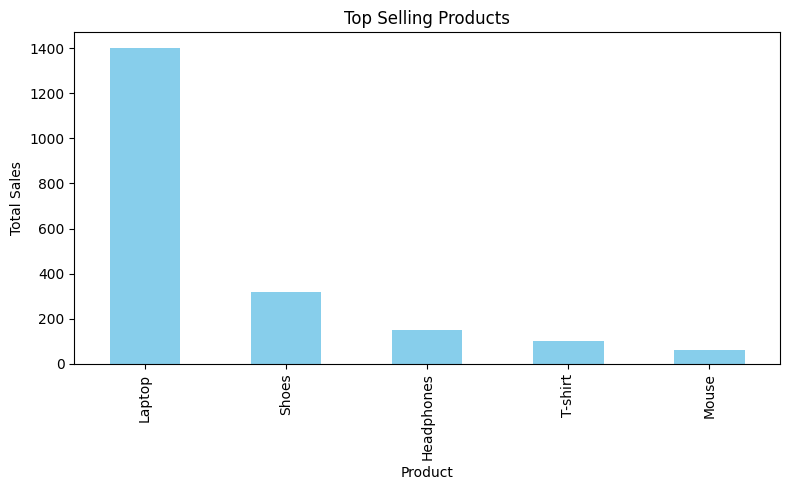

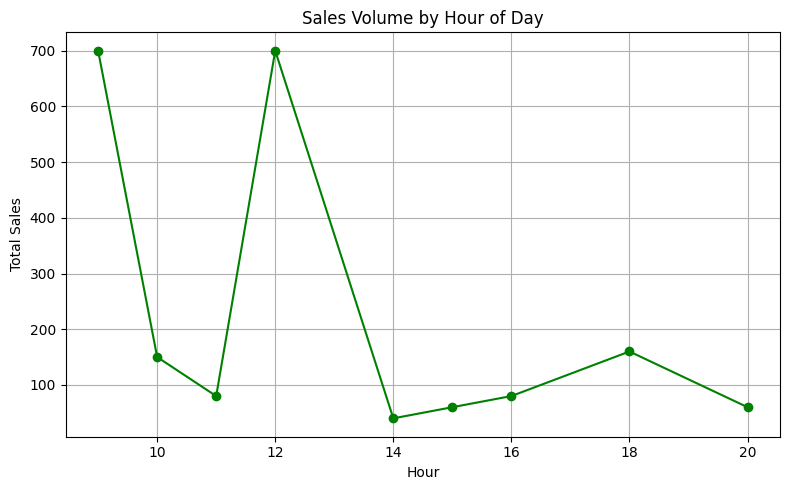

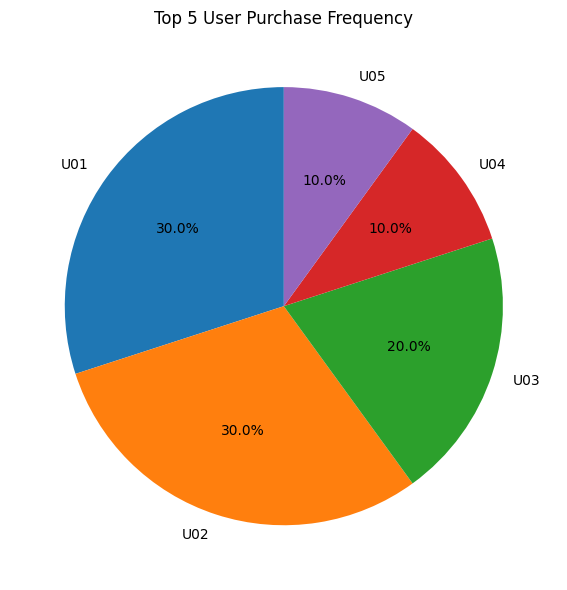

In [5]:
#problem5
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv(r"C:\Users\subod\Downloads\dataset\ecommerce_data.csv", parse_dates=["OrderDate"])

# Total Sales column
df["TotalSales"] = df["Quantity"] * df["Price"]

# Top-selling products
top_products = df.groupby("Product")["TotalSales"].sum().sort_values(ascending=False)

# Sales by hour
df["Hour"] = df["OrderDate"].dt.hour
hourly_sales = df.groupby("Hour")["TotalSales"].sum()

# User retention (number of orders per user)
user_orders = df["UserID"].value_counts()

# --- PLOTTING ---

# 1. Bar Chart - Top-selling Products
plt.figure(figsize=(8, 5))
top_products.plot(kind="bar", color="skyblue")
plt.title("Top Selling Products")
plt.ylabel("Total Sales")
plt.xlabel("Product")
plt.tight_layout()
plt.show()

# 2. Line Chart - Sales by Hour
plt.figure(figsize=(8, 5))
hourly_sales.plot(kind="line", marker="o", color="green")
plt.title("Sales Volume by Hour of Day")
plt.ylabel("Total Sales")
plt.xlabel("Hour")
plt.grid(True)
plt.tight_layout()
plt.show()

# 3. Pie Chart - User Retention
top_users = user_orders.head(5)
plt.figure(figsize=(6, 6))
top_users.plot(kind="pie", autopct="%1.1f%%", startangle=90)
plt.title("Top 5 User Purchase Frequency")
plt.ylabel("")
plt.tight_layout()
plt.show()


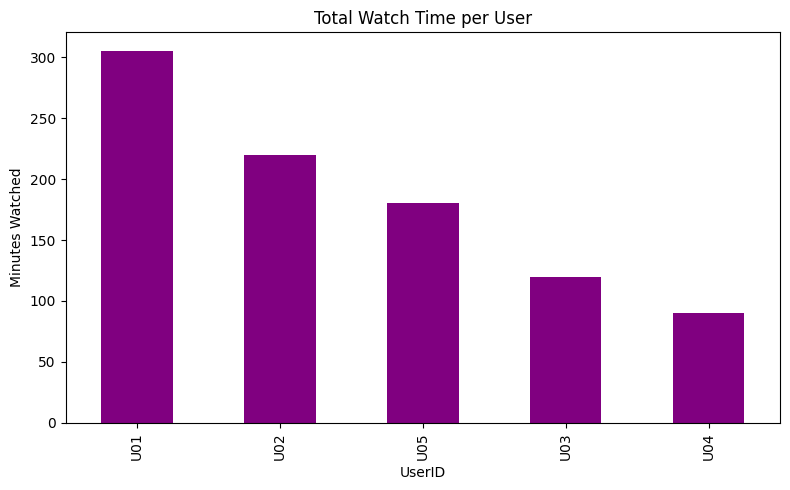

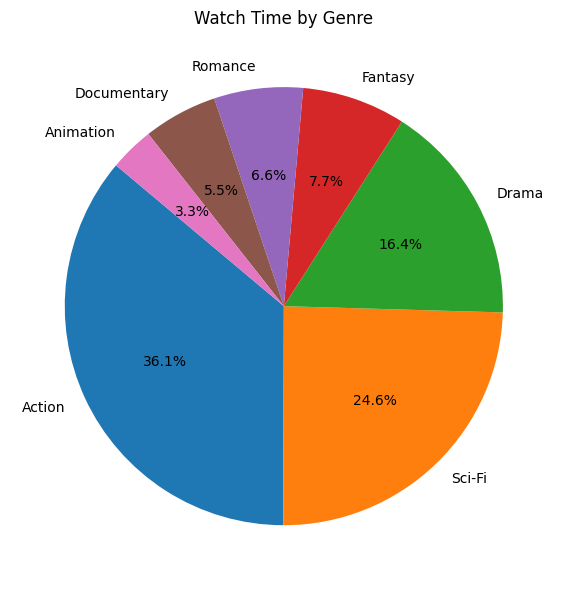

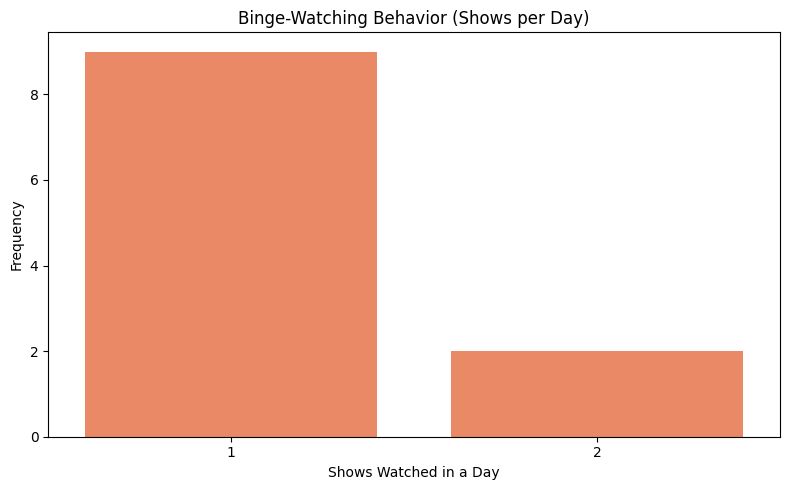

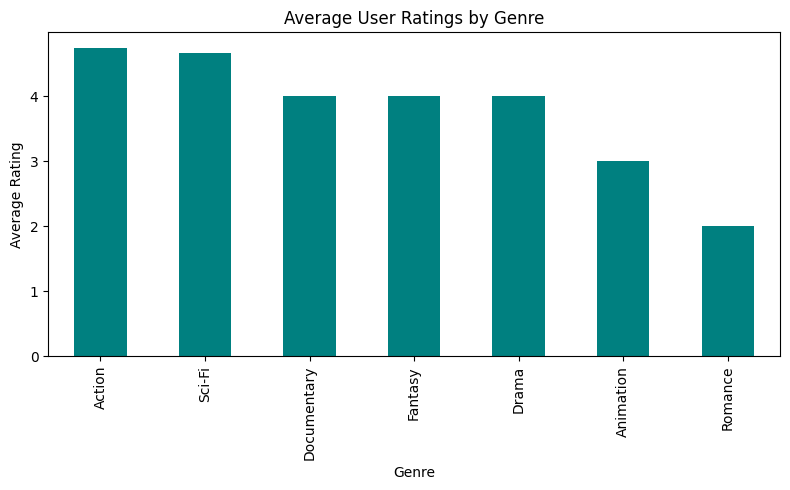

In [7]:
#problem6
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load and parse dataset
df = pd.read_csv(r"C:\Users\subod\Downloads\dataset\netflix_data.csv", parse_dates=["WatchDate"])

# Total watch time per user
watch_time = df.groupby("UserID")["WatchDuration"].sum().sort_values(ascending=False)

# Top genres
top_genres = df.groupby("Genre")["WatchDuration"].sum().sort_values(ascending=False)

# Average rating by genre
ratings_by_genre = df.groupby("Genre")["Rating"].mean().sort_values(ascending=False)

# Binge behavior (users watching multiple shows per day)
binge_counts = df.groupby(["UserID", "WatchDate"]).size().reset_index(name="ShowsWatched")
binge_users = binge_counts[binge_counts["ShowsWatched"] > 1]

# --- Visualization Section ---

# Bar chart: Watch hours per user
plt.figure(figsize=(8, 5))
watch_time.plot(kind='bar', color='purple')
plt.title("Total Watch Time per User")
plt.xlabel("UserID")
plt.ylabel("Minutes Watched")
plt.tight_layout()
plt.show()

# Pie chart: Top genres
plt.figure(figsize=(6, 6))
top_genres.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title("Watch Time by Genre")
plt.ylabel("")
plt.tight_layout()
plt.show()

# Line chart: Binge-watching behavior
plt.figure(figsize=(8, 5))
sns.countplot(data=binge_counts, x="ShowsWatched", color="coral")
plt.title("Binge-Watching Behavior (Shows per Day)")
plt.xlabel("Shows Watched in a Day")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# Bar chart: Average ratings by genre
plt.figure(figsize=(8, 5))
ratings_by_genre.plot(kind="bar", color="teal")
plt.title("Average User Ratings by Genre")
plt.ylabel("Average Rating")
plt.xlabel("Genre")
plt.tight_layout()
plt.show()


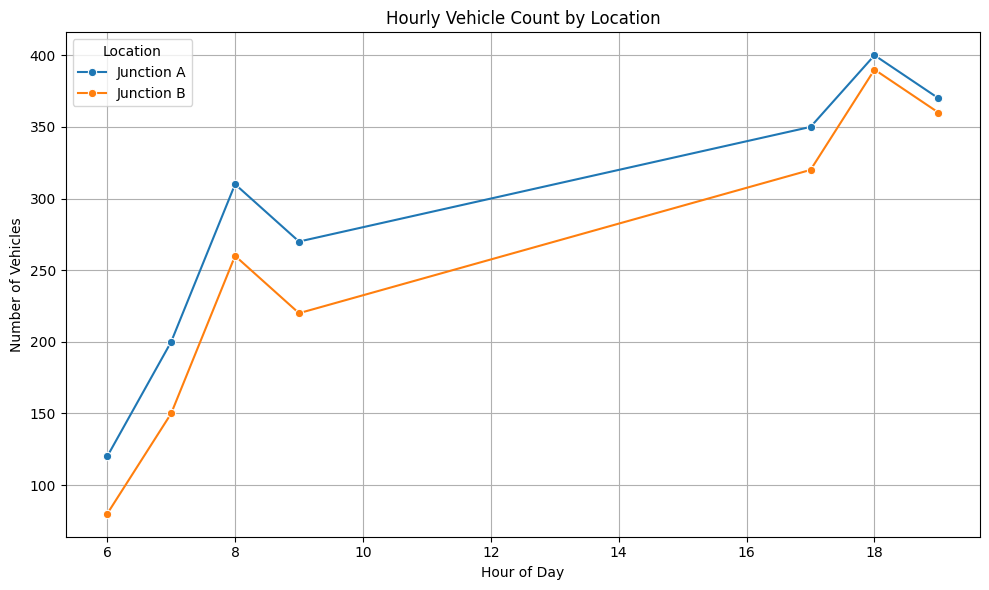


[INFO] Peak hours (average across locations):
Hour
18    395.0
19    365.0
17    335.0
8     285.0
9     245.0
Name: VehicleCount, dtype: float64


C:\Users\subod\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


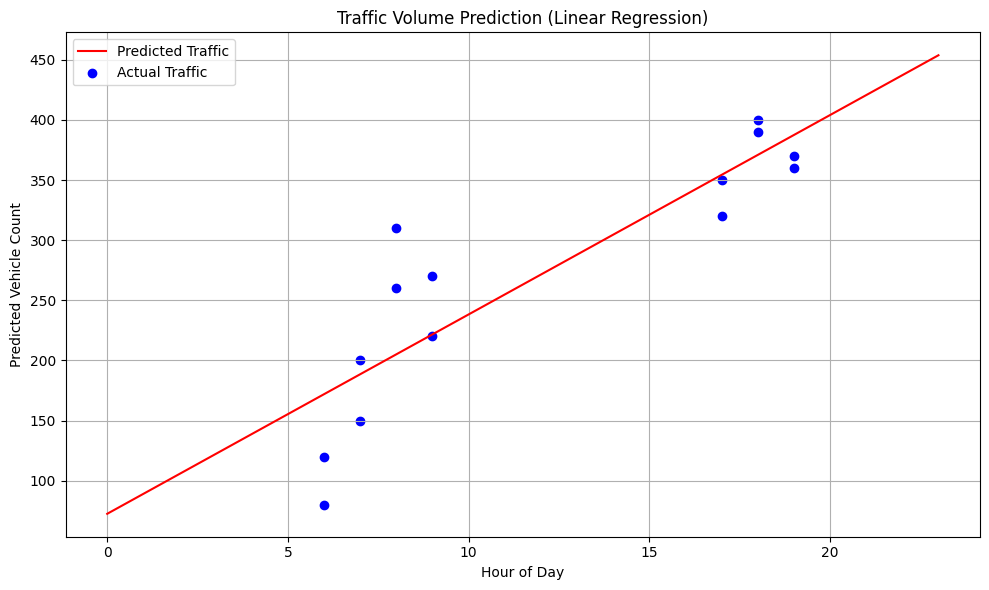

In [1]:
#problem7
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np

# Load dataset
df = pd.read_csv(r"C:\Users\subod\Downloads\dataset\traffic_data.csv")

# Combine Date and Hour for time series
df['Datetime'] = pd.to_datetime(df['Date']) + pd.to_timedelta(df['Hour'], unit='h')

# Plot traffic over time
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x="Hour", y="VehicleCount", hue="Location", marker="o")
plt.title("Hourly Vehicle Count by Location")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Vehicles")
plt.grid(True)
plt.tight_layout()
plt.show()

# Identify peak hours
peak_hours = df.groupby("Hour")["VehicleCount"].mean().sort_values(ascending=False)
print("\n[INFO] Peak hours (average across locations):")
print(peak_hours.head())

# Optional: Predict vehicle count using regression
model_df = df[['Hour', 'VehicleCount']]
X = model_df[['Hour']]
y = model_df['VehicleCount']

reg = LinearRegression()
reg.fit(X, y)

# Predict for each hour
pred_hours = np.arange(0, 24).reshape(-1, 1)
predictions = reg.predict(pred_hours)

# Plot prediction
plt.figure(figsize=(10, 6))
plt.plot(pred_hours, predictions, color='red', label='Predicted Traffic')
plt.scatter(df['Hour'], df['VehicleCount'], color='blue', label='Actual Traffic')
plt.title("Traffic Volume Prediction (Linear Regression)")
plt.xlabel("Hour of Day")
plt.ylabel("Predicted Vehicle Count")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


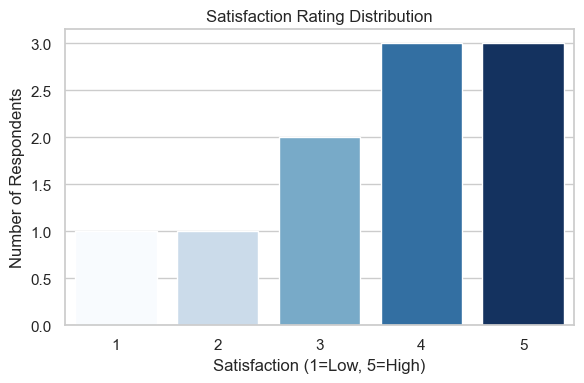

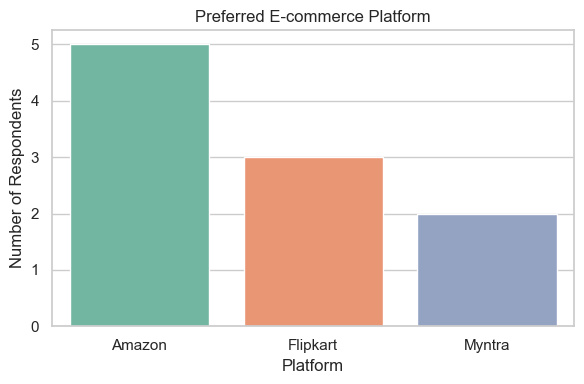

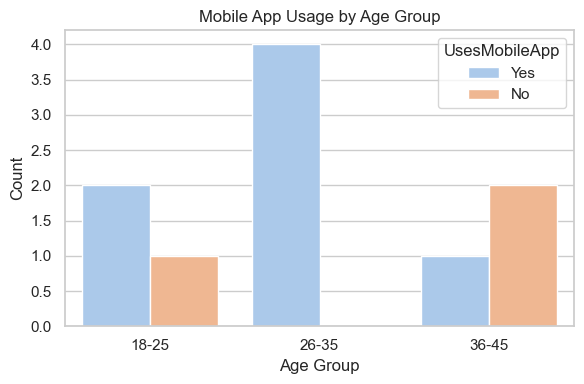

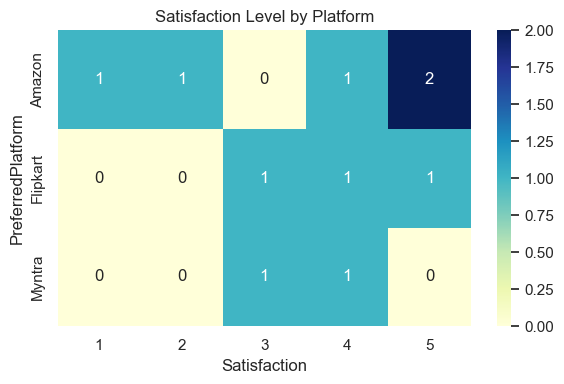

In [3]:
#problem8
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv(r"C:\Users\subod\Downloads\dataset\survey_data.csv")

# Set style
sns.set(style="whitegrid")

# 1. Satisfaction Distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="Satisfaction", hue="Satisfaction", palette="Blues", legend=False)
plt.title("Satisfaction Rating Distribution")
plt.xlabel("Satisfaction (1=Low, 5=High)")
plt.ylabel("Number of Respondents")
plt.tight_layout()
plt.show()

# 2. Platform Preferences
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="PreferredPlatform", hue="PreferredPlatform", palette="Set2", legend=False)
plt.title("Preferred E-commerce Platform")
plt.xlabel("Platform")
plt.ylabel("Number of Respondents")
plt.tight_layout()
plt.show()


# 3. Mobile App Usage by Age Group
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="AgeGroup", hue="UsesMobileApp", palette="pastel")
plt.title("Mobile App Usage by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# 4. Heatmap: Cross-tab Satisfaction vs Platform
pivot = pd.crosstab(df['PreferredPlatform'], df['Satisfaction'])
plt.figure(figsize=(6, 4))
sns.heatmap(pivot, annot=True, cmap="YlGnBu", fmt="d")
plt.title("Satisfaction Level by Platform")
plt.tight_layout()
plt.show()
